In [1]:
# simulating a very very simple kalman filter to understand it better 
import numpy as np
import matplotlib.pyplot as plt 

# defining system parameter
dt = 1.0

# state transition matrix, constant velocity model 
F = np.array([[1, dt], [0, 1]])

# observation matrix (only position)
H = np.array([[1, 0]])

# process noise covariance
Q = np.array([[0.1, 0], [0, 0.1]])

# measurement noise covariance, uncertainity in sensor
R = np.array([[1]])

x = np.array([[0], [1]])

# initial uncertainity covariance
P = np.eye(2)

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 2, 1)

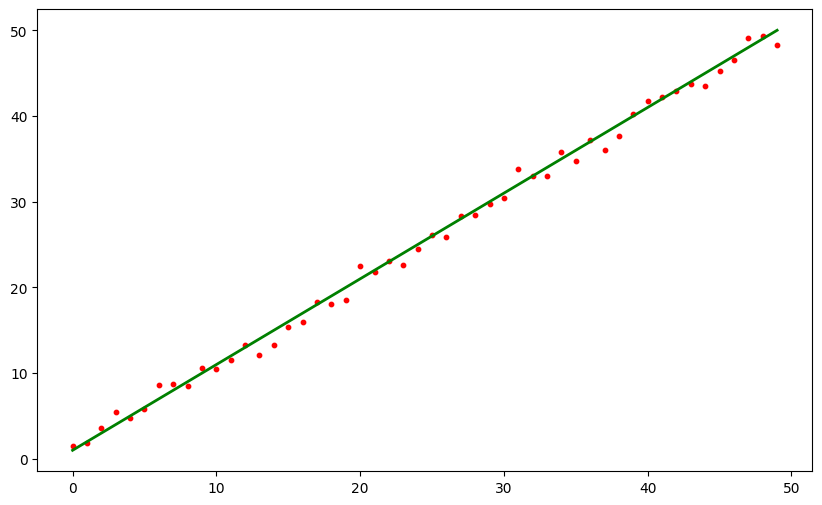

In [3]:
# simulate true positions and noisy measurements
np.random.seed(42)
true_positions = []
measurements = []
positions = 0

for i in range(50):
    positions += 1 # car moves 1 unit per time step 
    true_positions.append(positions)
    measurements.append(positions + np.random.normal(0, np.sqrt(R)))

true_positions = np.array(true_positions)
measurements = np.array(measurements)

estimates = []

for z in measurements:
    # prediction
    x = F @ x
    P = F @ P @ F.T + Q

    # update
    y = np.array([[z]]) - H @ x # measurement residual
    S = H @ P @ H.T + R # residual covariance
    K = P @ H.T @ np.linalg.inv(S) # kalman gain
    x = x + K @ y
    P = (np.eye(2) - K @ H) @ P

    # store position estimate
    estimates.append(x[0, 0])

    # plot results 
    plt.figure(figsize=(10,6))
    plt.plot(true_positions, label="True Position", color="green", linewidth=2)
    plt.scatter(range(len(measurements)), measurements, label="Measurements", color="red", s=10)
    plt.plot(estimates, label="Kalman Filter Estimate", color="blue", lifestyle="--")
    plt.legend()
    plt.xlabel("time step")
    plt.ylabel("position")
    plt.title("1D position tracking with kalmna filter")
    plt.show()